In [1]:
#Import API
from dora.api import DataExplorer

import pandas as pd
from datetime import date, timedelta
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

explorer = DataExplorer()

In [2]:
def plot3d(X,x,y,z,points,c):
    fig = pyplot.figure()
    ax = Axes3D(fig)
    colors = ['green','red','blue','black','salmon','indigo','plum','seagreen','grey','yellow']
    for i in range(points):
        ax.scatter(X.results[i][x], X.results[i][y],X.results[i][z], c=colors[X.results[i][c-1]])
    return fig

In [3]:
def prodPerCluster(df):
    fig=plt.figure()
    maxn=df['cluster'].max()
    plt.hist(df['cluster'].values)
    plt.xlabel('Products')
    plt.ylabel('# of Products')
    plt.xticks(range(0,maxn+1))
    plt.title('Number of Products per Cluster')
    return fig

In [4]:
def clusterDist(df):
    maxn=df['cluster'].max()
    clusterStats=pd.DataFrame()
    for i in range(maxn+1):
        mask=(df['cluster']==i)
        t=df.loc[mask]
        clusterStats.loc[i,'avgNumOrders']=t['numorders'].mean()
        clusterStats.loc[i,'avgRating']=t['avgrating'].mean()
        clusterStats.loc[i,'numCategories']=t['category'].nunique()
        clusterStats.loc[i,'avgDays_on_sale']=t['days_on_sale'].mean()
        clusterStats.loc[i,'avgSpringSales']=t['spring_sales'].mean()
        clusterStats.loc[i,'avgSummerSales']=t['summer_sales'].mean()
        clusterStats.loc[i,'avgFallSales']=t['fall_sales'].mean()
        clusterStats.loc[i,'avgWinterSales']=t['winter_sales'].mean()
        clusterStats.loc[i,'avgOneStars']=t['one_star_votes'].mean()
        clusterStats.loc[i,'avgTwoStars']=t['two_star_votes'].mean()
        clusterStats.loc[i,'avgThreeStars']=t['three_star_votes'].mean()
        clusterStats.loc[i,'avgFourStars']=t['four_star_votes'].mean()
        clusterStats.loc[i,'avgFiveStars']=t['five_star_votes'].mean()
    return clusterStats

Look at the statsByProduct to see the distribution of number of orders per product

In [5]:
prodStats=explorer.products.statsByProduct()
statsByProd=pd.DataFrame(prodStats.results, columns=prodStats.columns)

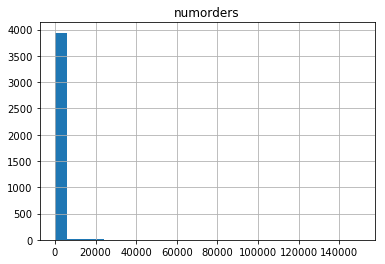

In [6]:
plt.figure()
statsByProd.hist(column='numorders', bins=25)
plt.show()

In [7]:
print('Percentage of products that have been ordered 50 times or less '+ str(
      (statsByProd.loc[statsByProd['numorders']<=50]['numorders'].count()/statsByProd.shape[0])*100))

Percentage of products that have been ordered 50 times or less 76.7552657974


In [8]:
print('Percentage of products that have been ordered over 50 times '+ str(
      (statsByProd.loc[statsByProd['numorders']>50]['numorders'].count()/statsByProd.shape[0])*100))

Percentage of products that have been ordered over 50 times 23.2447342026


Break up the clustering of the products into two groups based on the number of orders. 
Group 1: Less than 50 total orders
Group 2: More than 50 total orders

Group 1 Clustering:

In [9]:
group1_asin=statsByProd.loc[statsByProd['numorders']<=50]['asin'].values

In [10]:
group1stats=explorer.products.statsByProduct(asin=group1_asin)

In [11]:
group1clust=explorer.products.clusterProducts(feature_set=group1stats,n_clusters=7,
                                              cluster_on=['numorders','days_on_sale','one_star_votes',
                                                         'two_star_votes','three_star_votes','four_star_votes',
                                                         'five_star_votes'],
                                              random_state=1)

In [12]:
group1_df=pd.DataFrame(group1clust.results, columns=group1clust.columns)
group1_df.head()

,numorders,days_on_sale,one_star_votes,two_star_votes,three_star_votes,four_star_votes,five_star_votes,productid,asin,avgrating,category,spring_sales,summer_sales,fall_sales,winter_sales,cluster
0,34.0,445.0,0.0,0.0,0.0,1.0,0.0,10004,0000015393,4.0000000000000000,720870,0,24,9,1,5
1,49.0,1028.0,0.0,0.0,0.0,0.0,1.0,10009,0000174076,5.0000000000000000,4539344011,5,9,3,32,0
2,18.0,1230.0,1.0,0.0,0.0,0.0,0.0,10013,0000477141,1.00000000000000000000,15762881,3,1,6,8,6
3,36.0,1141.0,0.0,0.0,0.0,2.0,4.0,10014,000047715X,4.6666666666666667,3564987011,0,1,2,3,6
4,17.0,1159.0,0.0,0.0,1.0,0.0,0.0,10015,0000619574,3.0000000000000000,15762891,2,1,6,8,6


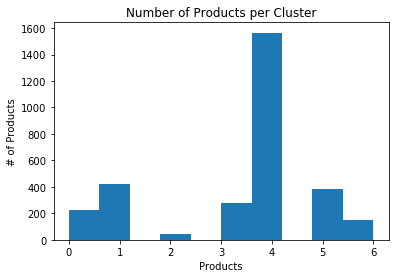

In [13]:
group1_prod_per_clust=prodPerCluster(group1_df)
group1_prod_per_clust

In [14]:
group1_dist=clusterDist(group1_df)
group1_dist

,avgNumOrders,avgRating,numCategories,avgDays_on_sale,avgSpringSales,avgSummerSales,avgFallSales,avgWinterSales,avgOneStars,avgTwoStars,avgThreeStars,avgFourStars,avgFiveStars
0,17.696035,4.289814,219.0,939.859031,3.105727,2.823789,2.973568,4.594714,0.061674,0.110132,0.180617,0.361233,0.995595
1,11.125891,4.238441,412.0,218.855107,1.679335,1.624703,0.959620,1.448931,0.111639,0.156770,0.313539,0.674584,1.693587
2,25.952381,4.393878,42.0,1956.071429,4.380952,4.809524,5.285714,8.071429,0.047619,0.071429,0.238095,0.404762,0.976190
3,12.207885,4.289461,269.0,689.372760,1.594982,1.695341,1.777778,2.813620,0.082437,0.078853,0.175627,0.430108,1.225806
4,5.614696,4.269103,1436.0,13.094569,0.546326,0.617891,0.316933,0.513738,0.228115,0.219808,0.403834,0.907348,2.487540
5,11.212598,4.257678,368.0,436.811024,1.984252,1.616798,1.367454,2.312336,0.102362,0.104987,0.204724,0.454068,1.223097
6,19.554795,4.349040,145.0,1248.842466,3.438356,3.150685,2.945205,4.623288,0.068493,0.041096,0.123288,0.472603,0.993151


In [15]:
group1clust.columns

array(['numorders', 'days_on_sale', 'one_star_votes', 'two_star_votes',
       'three_star_votes', 'four_star_votes', 'five_star_votes',
       'productid', 'asin', 'avgrating', 'category', 'spring_sales',
       'summer_sales', 'fall_sales', 'winter_sales', 'cluster'], dtype=object)

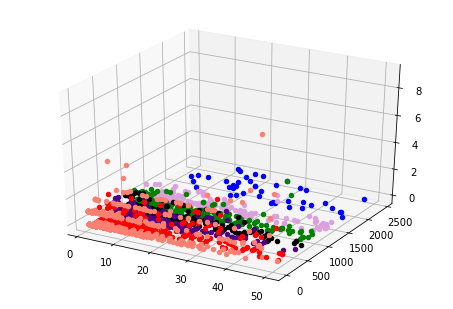

In [16]:
plot=plot3d(group1clust, 0, 1, 3, group1_df.shape[0],group1_df.shape[1])
plot

Group 2 Clustering:

In [17]:
group2_asin=statsByProd.loc[statsByProd['numorders']>50]['asin'].values

In [18]:
group2stats=explorer.products.statsByProduct(asin=group2_asin)

In [19]:
group2clust=explorer.products.clusterProducts(feature_set=group2stats,n_clusters=3,
                                              cluster_on=['numorders','days_on_sale'],
                                              random_state=1)

In [20]:
group2_df=pd.DataFrame(group2clust.results, columns=group2clust.columns)
group2_df.head()

,numorders,days_on_sale,productid,asin,avgrating,category,spring_sales,summer_sales,fall_sales,winter_sales,one_star_votes,two_star_votes,three_star_votes,four_star_votes,five_star_votes,cluster
0,512.0,629.0,10001,0000000116,2.5000000000000000,1,155,46,40,15,1,0,0,1,0,0
1,230.0,277.0,10002,0000000868,4.0000000000000000,173508,5,2,1,222,0,0,0,1,0,0
2,2408.0,118.0,10003,0000013714,4.2857142857142857,266162,0,0,65,107,1,0,1,4,8,0
3,8480.0,1501.0,10005,0000029831,4.8000000000000000,3564986011,442,330,378,553,0,0,0,1,4,0
4,3048.0,685.0,10006,0000038504,4.5000000000000000,882340,150,22,263,1089,0,0,0,1,1,0


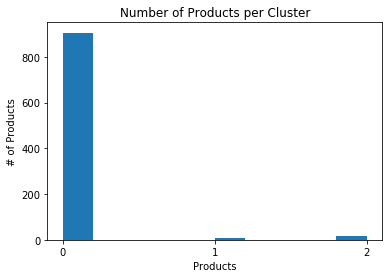

In [21]:
group2_prod_per_clust=prodPerCluster(group2_df)
group2_prod_per_clust

In [22]:
group2_dist=clusterDist(group2_df)
group2_dist

,avgNumOrders,avgRating,numCategories,avgDays_on_sale,avgSpringSales,avgSummerSales,avgFallSales,avgWinterSales,avgOneStars,avgTwoStars,avgThreeStars,avgFourStars,avgFiveStars
0,838.123757,4.250806,876.0,775.492818,42.309392,46.969061,58.218785,93.637569,2.928177,3.087293,5.008840,10.618785,31.711602
1,91847.833333,4.438360,6.0,658.166667,514.666667,927.500000,1243.166667,1499.333333,5.833333,5.500000,13.166667,46.500000,124.833333
2,31574.250000,4.428401,16.0,724.062500,197.437500,406.750000,476.187500,546.625000,25.562500,27.875000,51.687500,163.750000,809.500000


In [23]:
group2clust.columns

array(['numorders', 'days_on_sale', 'productid', 'asin', 'avgrating',
       'category', 'spring_sales', 'summer_sales', 'fall_sales',
       'winter_sales', 'one_star_votes', 'two_star_votes',
       'three_star_votes', 'four_star_votes', 'five_star_votes', 'cluster'], dtype=object)

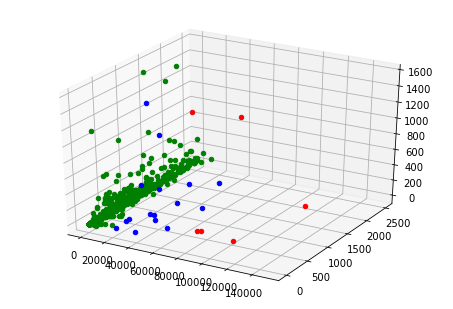

In [24]:
plot=plot3d(group2clust, 0, 1, 6, group2_df.shape[0],group2_df.shape[1])
plot

Elimiate Group 2 Cluster 1 and Group 2 Cluster 2 and foucs on clustering Group 2 Cluster 0

In [26]:
group2c0_asin=group2_df.loc[group2_df['cluster']==0]['asin'].values

In [27]:
group2c0stats=explorer.products.statsByProduct(asin=group2c0_asin)

In [28]:
group2c0clust=explorer.products.clusterProducts(feature_set=group2c0stats,n_clusters=7,
                                              cluster_on=['numorders','days_on_sale','one_star_votes',
                                                         'two_star_votes','three_star_votes','four_star_votes',
                                                         'five_star_votes'],
                                              random_state=1)

In [29]:
group2c0_df=pd.DataFrame(group2c0clust.results, columns=group2c0clust.columns)
group2c0_df.head()

,numorders,days_on_sale,one_star_votes,two_star_votes,three_star_votes,four_star_votes,five_star_votes,productid,asin,avgrating,category,spring_sales,summer_sales,fall_sales,winter_sales,cluster
0,512.0,629.0,1.0,0.0,0.0,1.0,0.0,10001,0000000116,2.5000000000000000,1,155,46,40,15,6
1,230.0,277.0,0.0,0.0,0.0,1.0,0.0,10002,0000000868,4.0000000000000000,173508,5,2,1,222,3
2,2408.0,118.0,1.0,0.0,1.0,4.0,8.0,10003,0000013714,4.2857142857142857,266162,0,0,65,107,4
3,8480.0,1501.0,0.0,0.0,0.0,1.0,4.0,10005,0000029831,4.8000000000000000,3564986011,442,330,378,553,5
4,3048.0,685.0,0.0,0.0,0.0,1.0,1.0,10006,0000038504,4.5000000000000000,882340,150,22,263,1089,2


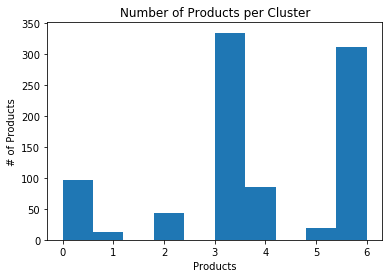

In [30]:
group2c0_prod_per_clust=prodPerCluster(group2c0_df)
group2c0_prod_per_clust

In [31]:
group2c0_dist=clusterDist(group2c0_df)
group2c0_dist

,avgNumOrders,avgRating,numCategories,avgDays_on_sale,avgSpringSales,avgSummerSales,avgFallSales,avgWinterSales,avgOneStars,avgTwoStars,avgThreeStars,avgFourStars,avgFiveStars
0,347.395833,4.289101,96.0,1942.989583,48.760417,49.083333,64.625000,94.885417,0.125000,0.093750,0.208333,0.583333,1.781250
1,11589.461538,4.428032,13.0,787.384615,182.384615,103.153846,390.307692,844.923077,7.307692,7.307692,17.846154,46.076923,119.615385
2,3441.045455,4.082694,44.0,758.181818,173.522727,197.727273,147.454545,229.818182,11.159091,10.454545,18.681818,45.522727,177.500000
3,237.047761,4.260739,329.0,245.197015,12.725373,15.214925,15.946269,30.495522,2.689552,2.850746,5.388060,12.695522,36.232836
4,1608.046512,4.126531,86.0,803.546512,116.476744,140.883721,153.755814,251.837209,3.813953,3.732558,4.965116,10.313953,25.837209
5,6522.526316,4.291663,19.0,907.210526,129.684211,199.894737,402.526316,386.315789,35.894737,41.263158,50.157895,67.105263,171.736842
6,261.064103,4.276450,310.0,971.842949,21.983974,21.612179,27.913462,49.112179,0.451923,0.544872,0.878205,1.721154,4.935897


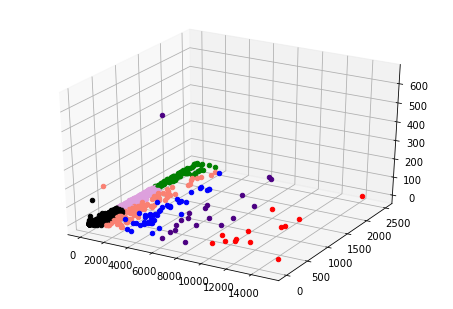

In [32]:
plot=plot3d(group2c0clust, 0, 1, 2, group2c0_df.shape[0],group2c0_df.shape[1])
plot

Cluster Based on the Number of Votes the Book Received 

Check to see if there are any books where there are zero votes

In [33]:
ratingdist=explorer.products.ratingsDistribution()
rating_df=pd.DataFrame(ratingdist.results, columns=ratingdist.columns)

In [34]:
mask=((rating_df['one_star_votes']==0) & (rating_df['two_star_votes']==0) & (rating_df['three_star_votes']==0)
      & (rating_df['four_star_votes']==0) & (rating_df['five_star_votes']==0))
non_zero_rating_df=rating_df.loc[mask]

In [35]:
non_zero_rating_df

,asin,productid,one_star_votes,two_star_votes,three_star_votes,four_star_votes,five_star_votes


All of the products have atleast one vote. Cluster on all of the prducts based on the number of votes. 

In [25]:
ratingCluster=explorer.products.clusterProducts(n_clusters=5, cluster_on=['one_star_votes',
                                                         'two_star_votes','three_star_votes',
                                                          'four_star_votes','five_star_votes'],
                                                random_state=3)

In [26]:
ratingC_df=pd.DataFrame(ratingCluster.results, columns=ratingCluster.columns)

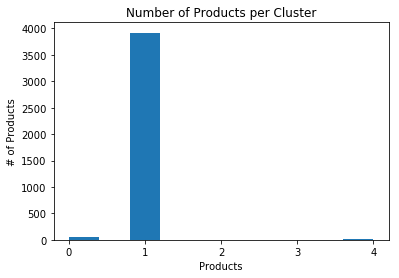

In [27]:
ratingC_prod_per_clust=prodPerCluster(ratingC_df)
ratingC_prod_per_clust

In [28]:
ratingC_dist=clusterDist(ratingC_df)
ratingC_dist

,avgNumOrders,avgRating,numCategories,avgDays_on_sale,avgSpringSales,avgSummerSales,avgFallSales,avgWinterSales,avgOneStars,avgTwoStars,avgThreeStars,avgFourStars,avgFiveStars
0,8039.074074,4.275511,54.0,198.888889,2.888889,8.851852,9.388889,9.314815,15.148148,16.555556,28.611111,67.333333,174.000000
1,313.546963,4.267739,3286.0,421.110005,12.381062,14.830015,17.986217,27.331547,0.299898,0.301174,0.581164,1.296835,3.414497
2,21601.000000,4.276349,3.0,372.333333,0.666667,0.333333,1.333333,1.333333,324.666667,372.000000,484.666667,942.666667,3474.333333
3,36248.000000,4.772346,1.0,60.000000,0.000000,4.000000,0.000000,0.000000,77.000000,93.000000,253.000000,970.000000,7669.000000
4,6687.500000,4.394768,12.0,396.166667,2.000000,3.000000,2.416667,2.416667,45.166667,41.333333,72.500000,179.916667,613.333333


In [29]:
ratingCluster.columns

array(['one_star_votes', 'two_star_votes', 'three_star_votes',
       'four_star_votes', 'five_star_votes', 'productid', 'asin',
       'numorders', 'avgrating', 'category', 'days_on_sale',
       'spring_sales', 'summer_sales', 'fall_sales', 'winter_sales',
       'cluster'], dtype=object)

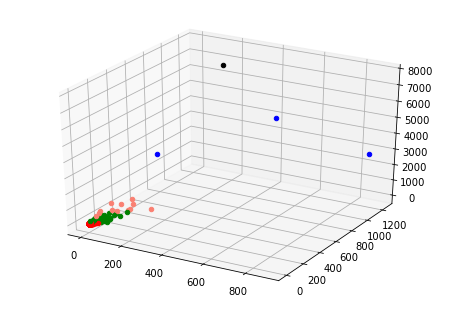

In [30]:
plot=plot3d(ratingCluster, 2, 3, 4, ratingC_df.shape[0],ratingC_df.shape[1])
plot

Clustering on Five Star Reviews, NumOrders, Summer_Sales, Days_on_Sale, Remove products with zero five star reviews

In [34]:
mask=((rating_df['five_star_votes']==0) | (rating_df['five_star_votes'] > 200))
five_star_rating_df=rating_df.loc[~mask]
five_star_asin=five_star_rating_df['asin'].values

In [35]:
five_star_prod=explorer.products.statsByProduct(asin=five_star_asin)

In [36]:
cluster=explorer.products.clusterProducts(feature_set=five_star_prod,
                                          n_clusters=5, 
                                          cluster_on=['numorders','five_star_votes',
                                                      'summer_sales','days_on_sale',
                                                     'three_star_votes'],
                                         random_state=3)

In [37]:
cluster_df=pd.DataFrame(cluster.results, columns=cluster.columns)

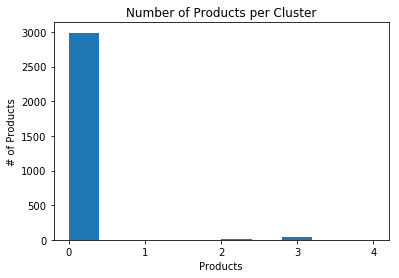

In [38]:
cluster_prod_per_clust=prodPerCluster(cluster_df)
cluster_prod_per_clust

In [39]:
cluster_dist=clusterDist(cluster_df)
cluster_dist

,avgNumOrders,avgRating,numCategories,avgDays_on_sale,avgSpringSales,avgSummerSales,avgFallSales,avgWinterSales,avgOneStars,avgTwoStars,avgThreeStars,avgFourStars,avgFiveStars
0,124.510033,4.588434,2584.0,400.738462,7.872910,8.455184,9.991639,15.453512,0.458863,0.477258,0.891973,1.982274,5.665217
1,68098.250000,4.532778,4.0,674.750000,654.750000,1259.000000,1771.250000,2150.500000,1.000000,2.250000,4.500000,16.000000,43.000000
2,28503.400000,4.419765,10.0,733.000000,282.300000,615.500000,662.900000,780.600000,6.500000,5.100000,8.300000,20.600000,59.700000
3,8295.176471,4.321166,33.0,868.794118,168.529412,164.470588,396.352941,569.911765,3.617647,3.117647,4.647059,8.411765,16.823529
4,149868.000000,4.086957,1.0,748.000000,468.000000,422.000000,682.000000,600.000000,5.000000,6.000000,6.000000,13.000000,39.000000


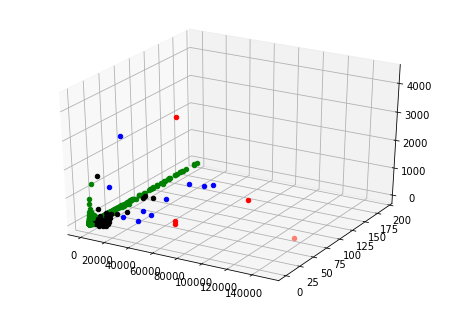

In [40]:
plot=plot3d(cluster, 0,1,2, cluster_df.shape[0], cluster_df.shape[1])
plot

Clustering Using PCA

In [41]:
cluster_pca=explorer.products.clusterProducts(feature_set=five_star_prod,
                                              n_clusters=5,
                                              n_components=3,
                                              cluster_on=['numorders','five_star_votes',
                                                          'summer_sales','days_on_sale',
                                                         'three_star_votes'],
                                              random_state=3)

/Users/laurawilke/Documents/DSE/lwilke/DSE203/dse203-group-project/data_exploration/dora/products.py:491: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if col not in clustering.columns.values:


In [42]:
cluster_pca_df=pd.DataFrame(cluster_pca.results, columns=cluster_pca.columns)

In [43]:
cluster_pca_dist=clusterDist(cluster_pca_df)
cluster_pca_dist

,avgNumOrders,avgRating,numCategories,avgDays_on_sale,avgSpringSales,avgSummerSales,avgFallSales,avgWinterSales,avgOneStars,avgTwoStars,avgThreeStars,avgFourStars,avgFiveStars
0,124.510033,4.588434,2584.0,400.738462,7.872910,8.455184,9.991639,15.453512,0.458863,0.477258,0.891973,1.982274,5.665217
1,68098.250000,4.532778,4.0,674.750000,654.750000,1259.000000,1771.250000,2150.500000,1.000000,2.250000,4.500000,16.000000,43.000000
2,28503.400000,4.419765,10.0,733.000000,282.300000,615.500000,662.900000,780.600000,6.500000,5.100000,8.300000,20.600000,59.700000
3,8295.176471,4.321166,33.0,868.794118,168.529412,164.470588,396.352941,569.911765,3.617647,3.117647,4.647059,8.411765,16.823529
4,149868.000000,4.086957,1.0,748.000000,468.000000,422.000000,682.000000,600.000000,5.000000,6.000000,6.000000,13.000000,39.000000


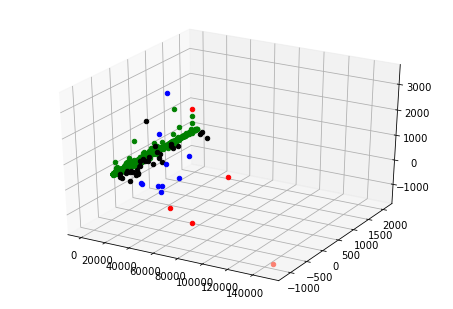

In [44]:
plot=plot3d(cluster_pca, 0,1,2, cluster_pca_df.shape[0], cluster_pca_df.shape[1])
plot